# My grad example

In [3]:
import torch
from torch.autograd import gradcheck

import splat.test.checked_covariance_derivatives as derivatives
from splat.test.create_image_auto import Camera, Gaussian

seed = torch.randint(0, 1000000, (1,))
torch.manual_seed(seed)
r = torch.randn(1, 4, requires_grad=True, dtype=torch.float64)
s = torch.randn(1, 3, requires_grad=True, dtype=torch.float64)
u = torch.randn(3, 3, requires_grad=False, dtype=torch.float64)

gaussian = Gaussian(
    mean_2d=torch.tensor([[16, 16, 1]]),
    r=r,
    s=s,
    color=torch.tensor([0.8, 0.8, 0.8]),
    opacity=torch.tensor([0.5])
)
# print(r)
# print(s)
# print(u)
r = gaussian.r
s = gaussian.s

output = derivatives.r_s_to_cov_2d(r, s, u)
print("output", output)

loss_my_grad = output.sum()

loss_my_grad.backward()

print(r.grad)
print(s.grad)

gradcheck(derivatives.r_s_to_cov_2d, (r, s, u))

output tensor([[[ -4.7629,   9.6985],
         [  8.9419, -17.2163]]], dtype=torch.float64,
       grad_fn=<invert_2x2_matrixBackward>)
tensor([[ 5.3478, -1.9588, -1.8786,  3.2278]], dtype=torch.float64)
tensor([[-6.3475, -2.5400,  0.1235]], dtype=torch.float64)


True

# Auto grad example

In [5]:
import torch

import splat.test.auto_functions as auto_functions

torch.manual_seed(seed)
r = torch.randn(1, 4, requires_grad=True, dtype=torch.float64)
s = torch.randn(1, 3, requires_grad=True, dtype=torch.float64)
u = torch.randn(3, 3, requires_grad=True, dtype=torch.float64)
# print(r)
# print(s)
# print(u)

output = auto_functions.r_s_to_cov_2d_auto(r, s, u)
print("output", output)

loss_auto_grad = output.sum()
loss_auto_grad.backward()

print(r.grad)
print(s.grad)

output tensor([[[ -4.7629,   9.6985],
         [  8.9419, -17.2163]]], dtype=torch.float64, grad_fn=<CopySlices>)
tensor([[ 5.3478, -1.9588, -1.8786,  3.2278]], dtype=torch.float64)
tensor([[-6.3475, -2.5400,  0.1235]], dtype=torch.float64)


# Toy gaussian example auto example

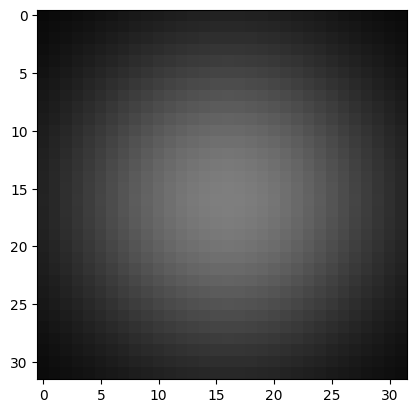

 20%|██        | 1/5 [00:01<00:06,  1.59s/it, loss=0.0306]

loss tensor(0.0306, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0021, -0.0158, -0.0239, -0.0016]])
S grad tensor([[0.4985, 0.4975, 0.0000]])
R tensor([[0.4950, 0.0250, 0.0350, 0.0060]], requires_grad=True)
S tensor([[0.0950, 0.0950, 0.1000]], requires_grad=True)





 40%|████      | 2/5 [00:03<00:04,  1.59s/it, loss=0.0254]

loss tensor(0.0254, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0029, -0.0183, -0.0258, -0.0089]])
S grad tensor([[0.4787, 0.4779, 0.0000]])
R tensor([[0.4900, 0.0300, 0.0400, 0.0103]], requires_grad=True)
S tensor([[0.0900, 0.0900, 0.1000]], requires_grad=True)





 60%|██████    | 3/5 [00:04<00:03,  1.63s/it, loss=0.0205]

loss tensor(0.0205, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0037, -0.0200, -0.0268, -0.0138]])
S grad tensor([[0.4502, 0.4499, 0.0000]])
R tensor([[0.4851, 0.0350, 0.0450, 0.0147]], requires_grad=True)
S tensor([[0.0850, 0.0850, 0.1000]], requires_grad=True)





 80%|████████  | 4/5 [00:06<00:01,  1.63s/it, loss=0.0159]

loss tensor(0.0159, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0045, -0.0205, -0.0265, -0.0175]])
S grad tensor([[0.4125, 0.4128, 0.0000]])
R tensor([[0.4801, 0.0401, 0.0500, 0.0194]], requires_grad=True)
S tensor([[0.0801, 0.0801, 0.1000]], requires_grad=True)





100%|██████████| 5/5 [00:08<00:00,  1.64s/it, loss=0.0117]

loss tensor(0.0117, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0051, -0.0199, -0.0250, -0.0197]])
S grad tensor([[0.3656, 0.3666, 0.0000]])
R tensor([[0.4751, 0.0451, 0.0550, 0.0241]], requires_grad=True)
S tensor([[0.0752, 0.0752, 0.1000]], requires_grad=True)



GT image


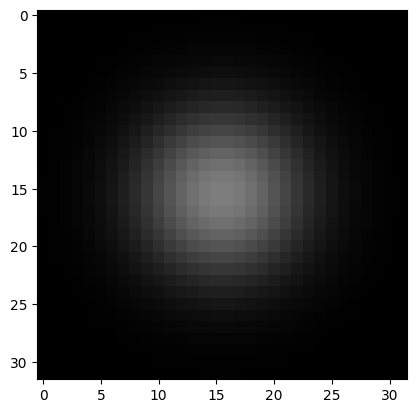

Final image


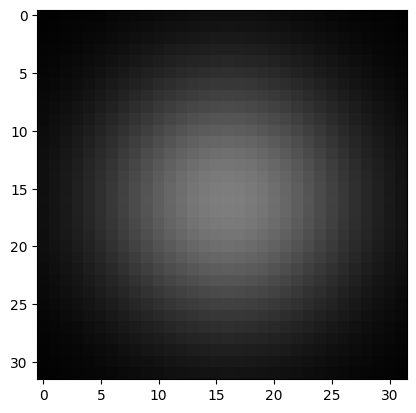

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from splat.test.create_image_auto import (
    Camera,
    Gaussian,
    create_image_covariance_test_auto,
)
import tqdm
torch.autograd.set_detect_anomaly(True)

point_2d = torch.tensor([[16, 16, 1]], dtype=torch.float32).requires_grad_(False)
r = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float32).requires_grad_(True)
s = torch.tensor([[.1, .1, .1]], dtype=torch.float32).requires_grad_(True)
color = torch.tensor([0.8, 0.8, 0.8], dtype=torch.float32).requires_grad_(False)
opacity = torch.tensor([0.5], dtype=torch.float32).requires_grad_(False)

gaussian = Gaussian(
    mean_2d=point_2d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_auto = create_image_covariance_test_auto(camera, gaussian, height, width)
plt.imshow(output_auto.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r, s], lr=0.005)

pbar = tqdm.tqdm(range(5))
for i in pbar:
    optimizer.zero_grad()
    output_auto = create_image_covariance_test_auto(camera, gaussian, height, width)
    loss = (output_auto - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    print("loss", loss)
    print("R grad", r.grad)
    print("S grad", s.grad)
    print("R", r)
    print("S", s)
    print("\n\n")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()

# Toy gaussian custom example

Starting image


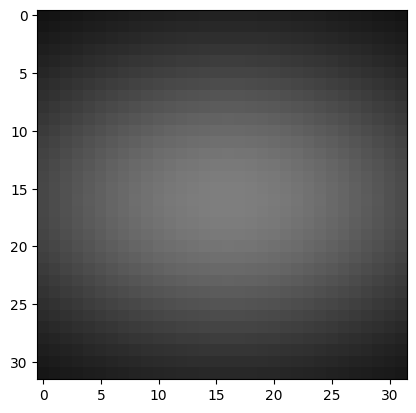

 20%|██        | 1/5 [00:01<00:06,  1.67s/it, loss=0.0511]

loss tensor(0.0511, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0026, -0.0150, -0.0335, -0.0019]])
S grad tensor([[0.6991, 0.3154, 0.0000]])
R tensor([[0.4950, 0.0250, 0.0350, 0.0060]], requires_grad=True)
S tensor([[0.0950, 0.1450, 0.2000]], requires_grad=True)





 40%|████      | 2/5 [00:03<00:05,  1.71s/it, loss=0.0457]

loss tensor(0.0457, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0037, -0.0185, -0.0377, -0.0110]])
S grad tensor([[0.6974, 0.3168, 0.0000]])
R tensor([[0.4900, 0.0300, 0.0400, 0.0102]], requires_grad=True)
S tensor([[0.0900, 0.1400, 0.2000]], requires_grad=True)





 60%|██████    | 3/5 [00:05<00:03,  1.69s/it, loss=0.0403]

loss tensor(0.0403, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0050, -0.0217, -0.0409, -0.0180]])
S grad tensor([[0.6862, 0.3160, 0.0000]])
R tensor([[0.4851, 0.0350, 0.0450, 0.0147]], requires_grad=True)
S tensor([[0.0850, 0.1350, 0.2000]], requires_grad=True)





 80%|████████  | 4/5 [00:06<00:01,  1.68s/it, loss=0.0349]

loss tensor(0.0349, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0065, -0.0246, -0.0428, -0.0246]])
S grad tensor([[0.6636, 0.3126, 0.0000]])
R tensor([[0.4802, 0.0400, 0.0501, 0.0192]], requires_grad=True)
S tensor([[0.0800, 0.1300, 0.2000]], requires_grad=True)





100%|██████████| 5/5 [00:08<00:00,  1.70s/it, loss=0.0296]

loss tensor(0.0296, dtype=torch.float64, grad_fn=<MeanBackward0>)
R grad tensor([[ 0.0079, -0.0269, -0.0431, -0.0301]])
S grad tensor([[0.6285, 0.3062, 0.0000]])
R tensor([[0.4752, 0.0451, 0.0551, 0.0239]], requires_grad=True)
S tensor([[0.0750, 0.1250, 0.2000]], requires_grad=True)



GT image


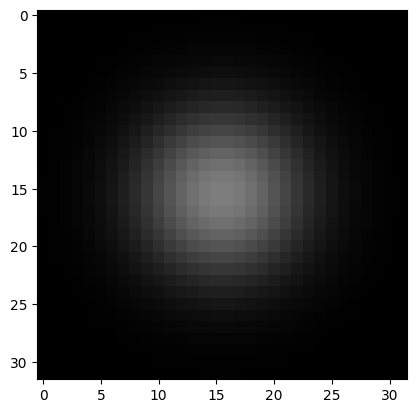

Final image


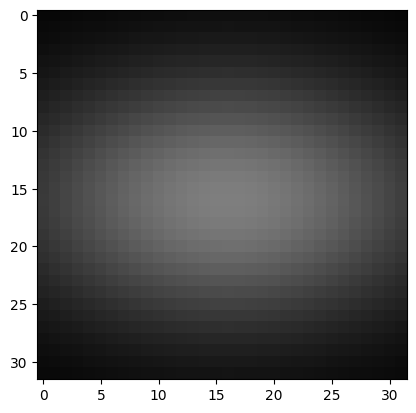

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import tqdm

from splat.test.create_image_auto import Camera, Gaussian
from splat.test.create_image_custom import create_image_covariance_test_custom

torch.autograd.set_detect_anomaly(True)

point_2d = torch.tensor([[16, 16, 1]], dtype=torch.float32).requires_grad_(False)
point_2d = torch.tensor([[16, 16, 1]], dtype=torch.float32).requires_grad_(False)
r = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float32).requires_grad_(True)
s = torch.tensor([[.1, .15, .2]], dtype=torch.float32).requires_grad_(True)
color = torch.tensor([0.8, 0.8, 0.8], dtype=torch.float32).requires_grad_(False)
opacity = torch.tensor([0.5], dtype=torch.float32).requires_grad_(False)


gaussian = Gaussian(
    mean_2d=point_2d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_custom = create_image_covariance_test_custom(camera, gaussian, height, width)
print("Starting image")
plt.imshow(output_custom.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r, s], lr=0.005)

pbar = tqdm.tqdm(range(5))
for i in pbar:
    optimizer.zero_grad()
    output_custom = create_image_covariance_test_custom(camera, gaussian, height, width)
    loss = (output_custom - gt_image).pow(2).mean()
    loss.backward()
    pbar.set_postfix(loss=loss.item())
    optimizer.step()
    print("loss", loss)
    print("R grad", r.grad)
    print("S grad", s.grad)
    print("R", r)
    print("S", s)
    print("\n\n")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_custom.detach().numpy())
plt.show()